<a href="https://colab.research.google.com/github/yuumi001/vcs-re/blob/main/Week07_RE01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 01 - Easy Crackme, Keygenme

1. BabyRE

Thông tin:

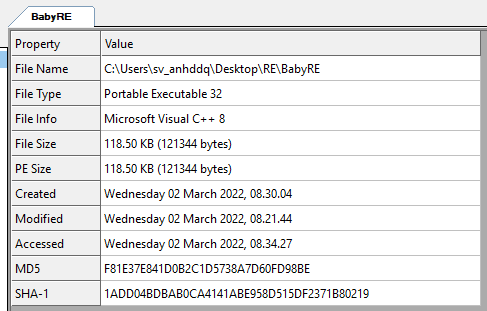

Disassembly main function:
```
int __cdecl main(int argc, const char **argv, const char **envp)
{
  unsigned int i; // esi
  int j; // edi
  char *v5; // esi
  int v6; // ecx
  __int128 v8; // [esp+0h] [ebp-28h] BYREF
  int v9; // [esp+10h] [ebp-18h]
  int v10; // [esp+14h] [ebp-14h]
  __int16 v11; // [esp+18h] [ebp-10h]
  char v12[8]; // [esp+1Ch] [ebp-Ch] BYREF

  v8 = xmmword_41B6E0;
  v9 = 1182494304;
  v10 = 1919444577;
  v11 = 1111;
  sub_401020("Guest your flag. The flag will be of the form flag{[a-zA-Z0-9]+}\n"); <- print content;
  sub_401020("Enter your key:");
  for ( i = 0; i < 5; ++i )
    sub_401050("%hhd", &v12[i]); <- scanf();
  for ( j = 0; j < 26; j += 2 )
  {
    v5 = &v8 + j;
    *v5 ^= v12[j % 5u];
    v6 = j;
    v5[1] ^= v12[v6 - 5 * (&v5[1 - &v8] / 5) + 1];
  }
  sub_401020("flag is : %s\n");
  return 0;
}
```
Nhận thấy v8, v9, v10, v11 là str[] = ```bdnpQai|nufimnug`n{FafhrW``` Khi chạy file cho phép nhập 5 chữ số (key) sau đó sẽ dùng key để xor với chuỗi str để ra flag. Và key để xor sẽ được lặp đến cuối `str`. 

Khi debug flag sẽ xor như sau:
```
esi = &str
-----------------------
xor     [esi], al     ; al = key[j]
...
xor     [esi+1], al   ; al = key[(j+1)%5] 


str [0] [1] [2] [3] [4] [5] [6] [7] [8] [9] [10] [...] 
key [0] [1] [2] [3] [4] [0] [1] [2] [3] [4] [0] [...]
```
Và có form flag `flag{` 

=> Tìm key bằng cách xor ngược lại 5 kí tự đầu

= > `key = str[0,1,2,3,4] xor 'flag{'`
```
C:\Users\sv_anhddq\Desktop\RE>py
Python 3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)] on win32
Type "help", "copyright", "credits" or "license" for more information.
>>> str = "bdnpQ"
>>> flg = "flag{"
>>> for i in range(5):
...     print(ord(str[i])^ord(flg[i]))
...
4
8
15
23
42
>>>
```
key = [4,8,15,23,42]
```
C:\Users\sv_anhddq\Desktop\RE>BabyRE
Guest your flag. The flag will be of the form flag{[a-zA-Z0-9]+}
Enter your key:4
8
15
23
42
flag is : flag{easy_baby_challenge}

C:\Users\sv_anhddq\Desktop\RE>
```

Flag: flag{easy_baby_challenge}



2. Crack_me1

Thông tin:

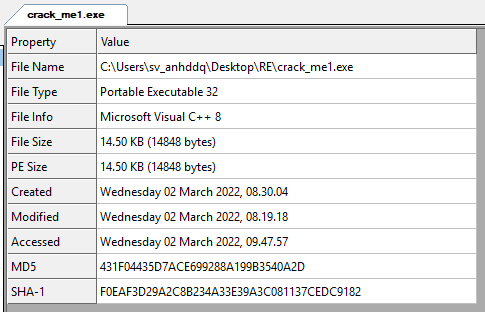


Sau 1 thời gian đọc hiểu disassembly code thì có thể hiểu ngắn gọn như sau:

```
int __cdecl main(int argc, const char **argv, const char **envp)
{
  char v4; // [esp+0h] [ebp-2CCh]
  char v5; // [esp+0h] [ebp-2CCh]
  char v6; // [esp+0h] [ebp-2CCh]
  char Format[160]; // [esp+8h] [ebp-2C4h] BYREF
  char v8; // [esp+A8h] [ebp-224h] BYREF
  char v9[299]; // [esp+A9h] [ebp-223h] BYREF
  char v10[200]; // [esp+1D4h] [ebp-F8h] BYREF
  void *v11; // [esp+29Ch] [ebp-30h]
  int v12; // [esp+2A0h] [ebp-2Ch]
  int i; // [esp+2C8h] [ebp-4h]

  v8 = 0;
  memset(v9, 0, sizeof(v9));
  v12 = 335;
  memset(v10, 0, sizeof(v10));
  strcpy(
    Format,
    "Do you remember the good old days?! I don't know how about you,but I don't. Please help me to recover my memory, it'"
    "s password protected, and that's sad :(\n");
  printf(Format);
  printf("Enter password: ");
  scanf("%300[^\n]s", &v8);
  v17 = strlen(&v8);
  if ( (v17) >= 0x126 )
  {
    if ( Check_PassWord(&v8) )
    {
      v18 = v17 / 3;
      for ( i = 0; i < v17; ++i )
        v10[i % v18] ^= v9[i - 1];
      for ( i = 0; i < v12; ++i )
        enc_flag[i] ^= v10[i % v18];
      printf("\n\nCongratulation! Here is your memo :> \n\n", v6);
      printf("%s", enc_flag);
    }
    else
    {
      printf("\nInvalid password\n");
    }
    getchar();
    getchar();
    return 0;
  }
  else
  {
    printf("oh, no!");
    return 0;
  }
}

char __cdecl Check_PassWord(const char *a1)
{
  int i; // [esp+14h] [ebp-10h]
  _DWORD *v3; // [esp+18h] [ebp-Ch]

  v3 = &unk_404BE8;
  if ( strlen(a1) < 55 )
    return 0;
  for ( i = 0; i < 122; ++i )
  {
    if ( !Check_char(*v3, &a1[v3[1]], v3 + 2) )
      return 0;
    v3 += 3;
  }
  return 1;
}

char __cdecl Check_char(int a1, int a2, int a3)
{
  char v4[4]; // [esp+0h] [ebp-20h] BYREF
  LPVOID v5; // [esp+4h] [ebp-1Ch]
  LPVOID v6; // [esp+8h] [ebp-18h]
  SIZE_T v7; // [esp+Ch] [ebp-14h]
  SIZE_T v8; // [esp+10h] [ebp-10h]
  LPVOID lpAddress; // [esp+14h] [ebp-Ch]
  SIZE_T dwSize; // [esp+18h] [ebp-8h]
  char v11; // [esp+1Fh] [ebp-1h]

  v8 = 221;
  v5 = Init_func_from_arr(&unk_404288, 0xDDu, 5);
  v7 = 278;
  v6 = Init_func_from_arr(&unk_404170, 0x116u, 6);
  if ( !v5 || !v6 )
    return 0;
  switch ( a1 )
  {
    case 1:
      dwSize = 97;
      lpAddress = Init_func_from_arr(&unk_404B80, 0x61u, 1);
      break;
    case 2:
      dwSize = 142;
      lpAddress = Init_func_from_arr(&unk_404AF0, 0x8Eu, 2);
      break;
    case 3:
      dwSize = 1685;
      lpAddress = Init_func_from_arr(&unk_404458, 0x695u, 3);
      break;
    case 4:
      dwSize = 235;
      lpAddress = Init_func_from_arr(&unk_404368, 0xEBu, 4);
      break;
    default:
      return 0;
  }
  if ( !lpAddress )
    return 0;
  v11 = (lpAddress)(a2, a3, v4);
  VirtualFree(lpAddress, dwSize, 0x8000u);
  VirtualFree(v5, v8, 0x8000u);
  VirtualFree(v6, v7, 0x8000u);
  return v11;
}

```

Có thể thấy khi nhập pass chuỗi nhập vào sẽ được đưa vào hàm Check_PassWord() để kiểm tra nếu chính xác ta sẽ nhận được flag. Để đi sâu vào hơn chuỗi sẽ được đưa vào hàm check_char(func_type , idx, char) để kiểm tra.

Nhận thấy được hàm check_pass() có create cách function sau đó sử dụng để check kí tự trong pass, bằng cách decompile shellcode được tạo ra các hàm chính được tạo ra như sau:

```
bool __cdecl func01(char *a1, unsigned int *a2)
{
  char v2; // cl

  v2 = *a1 % 2;
  if ( !v2 && (*a1 ^ 0x20) == *a2 )
    return 1;
  return v2 == 1 && (*a1 ^ 0x52) == *a2;
}

bool __cdecl func02(char *a1, unsigned int *a2)
{
  int i; // [esp+0h] [ebp-Ch]
  unsigned int v4; // [esp+8h] [ebp-4h]

  v4 = a1[1] | (unsigned int)(*a1 << 8);	// v4 = a1[1] | (a1[0] << 8);
  for ( i = 1; i <= 5; ++i )
    v4 = (((int)v4 >> (16 - i)) | (v4 << i)) ^ 0x1693;
  return *a2 == v4;
}

bool __cdecl func03(char *a1, unsigned int *a2)
{
  char v3[68]; // [esp+0h] [ebp-64h] BYREF
  int v4; // [esp+44h] [ebp-20h]
  int v5; // [esp+48h] [ebp-1Ch]
  int v7; // [esp+50h] [ebp-14h]
  int i; // [esp+54h] [ebp-10h]
  int v9; // [esp+58h] [ebp-Ch]
  unsigned int v10; // [esp+5Ch] [ebp-8h]
  unsigned int v11; // [esp+5Dh] [ebp-7h]
  unsigned int v12; // [esp+5Eh] [ebp-6h]
  char v13; // [esp+5Fh] [ebp-5h]
  char v14; // [esp+60h] [ebp-4h]
  char v15; // [esp+61h] [ebp-3h]
  char v16; // [esp+62h] [ebp-2h]

  v9 = 0;
  i = 0;
  v7 = 3;
  v5 = 0;
  v4 = 0;
  memcpy(v3, "ABDCEHGFIJKLUNOPYRTSMVWXQZajcdefohibkmlngpqrstuv4xzy8123w56709+0", 64);
  while ( v7-- )
  {
    *(&v14 + v9++) = *a1++;	//v14 v15 v16 = a1[0,1,2]; x,y,z
    v14 = a1[0];
    if ( v9 == 3 )
    {
      v10 = (v14 & 0xFC) >> 2;	// b64_str[(a1[0] & 0xFC)>>2] = a2[0] 
      if ( (char)v3[v10] != a2[0] )
        return 0;
      v11 = ((v15 & 0xF0) >> 4) + 16 * (v14 & 3); // b64_str[((a1[1] & 0xF0)>>4)+16*a1[0]&3] = a2[1]
      if ( (char)v3[v11] != a2[1] )
        return 0;
      v12 = ((v16 & 0xC0) >> 6) + 4 * (v15 & 0xF); // b64_str[((a1[2]&0xC0)>>6)+4*(a1[1]&0xF)] = a2[2]
      if ( (char)v3[v12] != a2[2] )
        return 0;
      v13 = v16 & 0x3F;
      if ( (char)v3[v16 & 0x3F] != a2[3] ) // b64_str[(a1[2] & 0x3F)] = a2[3]
        return 0;
      v9 = 0;
    }
  }
  if ( v9 <= 0 )
    return 1;
  for ( i = v9; i < 3; ++i )
    *(&v14 + i) = 0;
  v10 = (v14 & 0xFC) >> 2;
  if ( (char)v3[v10] != a2[0] )
    return 0;
  v11 = ((v15 & 0xF0) >> 4) + 16 * (v14 & 3);
  if ( (char)v3[v11] != a2[1] )
    return 0;
  v12 = ((v16 & 0xC0) >> 6) + 4 * (v15 & 0xF);
  if ( (char)v3[v12] != a2[2] )
    return 0;
  v13 = v16 & 0x3F;
  return (char)v3[v16 & 0x3F] == a2[3];
}

int __cdecl func04(char *a1, int a2, int a3)
{
  char v4[256]; // [esp+0h] [ebp-11Ch] BYREF

  void (__cdecl *v6)(char *, char *); // [esp+104h] [ebp-18h]
  int (__cdecl *v5)(char *, char *, int); // [esp+100h] [ebp-1Ch]
  char v7[8]; // [esp+108h] [ebp-14h] BYREF
  char v8[11]; // [esp+110h] [ebp-Ch] BYREF

  strcpy(v8, "susan");
  v6 = *(void (__cdecl **)(char *, char *))(a3 + 4);
  v5 = *(int (__cdecl **)(char *, char *, int))(a3 + 8);
  v6(v8, v4); // <= create array
  v7[0] = *a1;
  v7[1] = a1[1];
  v7[2] = a1[2];
  v7[3] = a1[3];
  v7[4] = 0;
  return v5(v4, v7, a2); // <= enc func
}
```

Hàm func01:

Kiểm tra kí tự a[i] tại vị trí idx bằng cách xor với 0x20 nếu chẵn hoặc 0x52 nếu lẻ sau đó so sánh với `BYTE` trong data



Hàm func02:

Kiểm tra kí tự a[i] và a[i+1] tại vị trí idx bằng cách dịch bit nhiều lần và xor với 0x1693 sau đó so sánh với `WORD` trong data



Hàm func03:

Kiểm tra kí tự a[i], a[i+1], a[i+2] tại vị trí idx bằng phép dịch bit (res) sau đó so sánh với charset[res] với từng `BYTE` trong data



Hàm func04(gồm 2 hàm nhỏ init_array và encrypt_array):

Kiểm tra kí tự a[i], a[i+1], a[i+2], a[i+3] tại vị trí idx bằng array tạo ra từ init_array(bằng cách dùng `const char "susan"`) sau đó xor bằng hàm `encrypt_array` để kiểm tra với từng `BYTE` trong data 

Trừ hàm func02 sử dụng cách brute để kiểm tra, các hàm func01, func03, func04 có thể reverse như sau:

```
def s1(x):
	x = x & 0xff
	if x%2==0:
		a = chr(x^0x20)
		return a
	else:
		a = chr(x^0x52)
		return a
def s2(x):
	x = x & 0xffff
	for i in range(0,0xffff+1):
		a = i
		a = (((((a >> 15)&0xffff) | ((a << 1)&0xffff) ) &0xffff)^0x1693)&0xffff
		a = (((((a >> 14)&0xffff) | ((a << 2)&0xffff) ) &0xffff)^0x1693)&0xffff
		a = (((((a >> 13)&0xffff) | ((a << 3)&0xffff) ) &0xffff)^0x1693)&0xffff
		a = (((((a >> 12)&0xffff) | ((a << 4)&0xffff) ) &0xffff)^0x1693)&0xffff
		a = (((((a >> 11)&0xffff) | ((a << 5)&0xffff) ) &0xffff)^0x1693)&0xffff
		if (a&0xffff)==x:
			b = chr(i&0xff)
			a = chr(i>>8)
			return a, b
def s3(x):
	b64_str = "ABDCEHGFIJKLUNOPYRTSMVWXQZajcdefohibkmlngpqrstuv4xzy8123w56709+0"
	a = [0]*4		# x = a[3,2,1,0]
	a[0] = x & 0xff
	a[1] = ((x & 0xffff) >> 8)&0xff
	a[2] = ((x & 0xffffff) >> 16)&0xff
	a[3] = (x >> 24)&0xff
	for i in range(4):
		a[i] = b64_str.find(chr(a[i]))
	x = (a[0] << 2) + ((a[1] & 0x30) >> 4)
	y = ((a[1] & 0xf) << 4) + ((a[2] & 0x3c) >> 2)
	z = ((a[2] & 0x3) << 6) + a[3]

	return chr(x),chr(y),chr(z)
def s4(x):
	b = [115, 233, 57, 208, 152, 187, 214, 35, 22, 25, 252, 124, 15, 50, 128, 178, 156, 87, 54, 158, 145, 77, 223, 122, 8, 66, 118, 165, 17, 173, 62, 210, 101, 79, 113, 32, 160, 40, 195, 51, 78, 108, 121, 149, 175, 107, 200, 112, 162, 65, 146, 186, 75, 209, 227, 188, 43, 244, 28, 70, 120, 217, 182, 4, 237, 150, 104, 151, 245, 9, 58, 37, 235, 190, 73, 216, 109, 181, 19, 126, 0, 119, 111, 180, 14, 29, 183, 44, 202, 127, 60, 95, 125, 169, 136, 196, 192, 94, 24, 205, 224, 12, 98, 41, 84, 132, 7, 71, 201, 247, 46, 6, 226, 36, 131, 228, 82, 21, 69, 67, 218, 49, 130, 135, 184, 20, 231, 207, 229, 64, 26, 221, 154, 53, 133, 243, 99, 177, 240, 61, 13, 234, 139, 238, 153, 174, 164, 81, 168, 30, 27, 197, 52, 76, 253, 255, 236, 55, 100, 117, 5, 1, 140, 33, 163, 96, 80, 106, 185, 92, 83, 206, 38, 193, 59, 242, 63, 102, 204, 47, 161, 148, 86, 89, 74, 159, 215, 137, 72, 91, 18, 157, 143, 85, 213, 191, 93, 45, 248, 31, 48, 11, 90, 68, 103, 42, 56, 249, 246, 110, 123, 239, 232, 138, 222, 199, 241, 167, 203, 220, 212, 211, 39, 254, 16, 2, 189, 144, 250, 225, 105, 230, 114, 171, 172, 34, 142, 134, 155, 251, 166, 23, 179, 97, 116, 198, 194, 88, 176, 170, 219, 147, 141, 3, 10, 129]
	a = [0]*4		# x = a[3,2,1,0]
	a[0] = x & 0xff
	a[1] = ((x & 0xffff) >> 8)&0xff
	a[2] = ((x & 0xffffff) >> 16)&0xff
	a[3] = (x >> 24)&0xff
	i=0
	q = [0]*4
	x,y,z = 0,0,0
	for i in range(4):
		x = (x + 1) % 256
		y = ( y + b[x] ) % 256
		z = b[x]
		b [ x ] = b [ y ]
		b [ y ] = z
		q[ i ] = b [ ( b [ y ] + b[ x ] ) % 256  ] ^ a[ i ]
	return q
```

sau đó extract data để reverse từ biến v3 trong hàm check_password() thông qua `idaapi.get_bytes(addr, size)` từ đó có code solve hoàn chỉnh 
```
def s1(x):
	x = x & 0xff
	if x%2==0:
		a = chr(x^0x20)
		return a
	else:
		a = chr(x^0x52)
		return a
def s2(x):
	x = x & 0xffff
	for i in range(0,0xffff+1):
		a = i
		a = (((((a >> 15)&0xffff) | ((a << 1)&0xffff) ) &0xffff)^0x1693)&0xffff
		a = (((((a >> 14)&0xffff) | ((a << 2)&0xffff) ) &0xffff)^0x1693)&0xffff
		a = (((((a >> 13)&0xffff) | ((a << 3)&0xffff) ) &0xffff)^0x1693)&0xffff
		a = (((((a >> 12)&0xffff) | ((a << 4)&0xffff) ) &0xffff)^0x1693)&0xffff
		a = (((((a >> 11)&0xffff) | ((a << 5)&0xffff) ) &0xffff)^0x1693)&0xffff
		if (a&0xffff)==x:
			b = chr(i&0xff)
			a = chr(i>>8)
			return a, b
def s3(x):
	b64_str = "ABDCEHGFIJKLUNOPYRTSMVWXQZajcdefohibkmlngpqrstuv4xzy8123w56709+0"
	a = [0]*4		# x = a[3,2,1,0]
	a[0] = x & 0xff
	a[1] = ((x & 0xffff) >> 8)&0xff
	a[2] = ((x & 0xffffff) >> 16)&0xff
	a[3] = (x >> 24)&0xff
	for i in range(4):
		a[i] = b64_str.find(chr(a[i]))
	x = (a[0] << 2) + ((a[1] & 0x30) >> 4)
	y = ((a[1] & 0xf) << 4) + ((a[2] & 0x3c) >> 2)
	z = ((a[2] & 0x3) << 6) + a[3]

	return chr(x),chr(y),chr(z)
def s4(x):
	b = [115, 233, 57, 208, 152, 187, 214, 35, 22, 25, 252, 124, 15, 50, 128, 178, 156, 87, 54, 158, 145, 77, 223, 122, 8, 66, 118, 165, 17, 173, 62, 210, 101, 79, 113, 32, 160, 40, 195, 51, 78, 108, 121, 149, 175, 107, 200, 112, 162, 65, 146, 186, 75, 209, 227, 188, 43, 244, 28, 70, 120, 217, 182, 4, 237, 150, 104, 151, 245, 9, 58, 37, 235, 190, 73, 216, 109, 181, 19, 126, 0, 119, 111, 180, 14, 29, 183, 44, 202, 127, 60, 95, 125, 169, 136, 196, 192, 94, 24, 205, 224, 12, 98, 41, 84, 132, 7, 71, 201, 247, 46, 6, 226, 36, 131, 228, 82, 21, 69, 67, 218, 49, 130, 135, 184, 20, 231, 207, 229, 64, 26, 221, 154, 53, 133, 243, 99, 177, 240, 61, 13, 234, 139, 238, 153, 174, 164, 81, 168, 30, 27, 197, 52, 76, 253, 255, 236, 55, 100, 117, 5, 1, 140, 33, 163, 96, 80, 106, 185, 92, 83, 206, 38, 193, 59, 242, 63, 102, 204, 47, 161, 148, 86, 89, 74, 159, 215, 137, 72, 91, 18, 157, 143, 85, 213, 191, 93, 45, 248, 31, 48, 11, 90, 68, 103, 42, 56, 249, 246, 110, 123, 239, 232, 138, 222, 199, 241, 167, 203, 220, 212, 211, 39, 254, 16, 2, 189, 144, 250, 225, 105, 230, 114, 171, 172, 34, 142, 134, 155, 251, 166, 23, 179, 97, 116, 198, 194, 88, 176, 170, 219, 147, 141, 3, 10, 129]
	a = [0]*4		# x = a[3,2,1,0]
	a[0] = x & 0xff
	a[1] = ((x & 0xffff) >> 8)&0xff
	a[2] = ((x & 0xffffff) >> 16)&0xff
	a[3] = (x >> 24)&0xff
	i=0
	q = [0]*4
	x,y,z = 0,0,0
	for i in range(4):
		x = (x + 1) % 256
		y = ( y + b[x] ) % 256
		z = b[x]
		b [ x ] = b [ y ]
		b [ y ] = z
		q[ i ] = b [ ( b [ y ] + b[ x ] ) % 256  ] ^ a[ i ]
	return q
def solve():
	x = b'\x01\x00\x00\x00\x00\x00\x00\x00t\xcc\xcc\xcc\x01\x00\x00\x00\x01\x00\x00\x00H\xcc\xcc\xcc\x01\x00\x00\x00\x02\x00\x00\x00;\xcc\xcc\xcc\x02\x00\x00\x00\x88\x00\x00\x00\x81$\xcc\xcc\x03\x00\x00\x00o\x00\x00\x00c3Yo\x02\x00\x00\x00\x84\x00\x00\x00\x01\x01\xcc\xcc\x02\x00\x00\x00\n\x00\x00\x005\xaf\xcc\xcc\x01\x00\x00\x00\xd0\x00\x00\x003\xcc\xcc\xcc\x03\x00\x00\x00\x0f\x00\x00\x00dMxv\x04\x00\x00\x00\x12\x00\x00\x00\xdd \xb1\x1a\x01\x00\x00\x00\x06\x01\x00\x00\x0c\xcc\xcc\xcc\x03\x00\x00\x00\xe8\x00\x00\x00jDB5\x02\x00\x00\x00\x1d\x00\x00\x00\xa6!\xcc\xcc\x02\x00\x00\x00\x1f\x00\x00\x00\xbe\x8a\xcc\xcc\x01\x00\x00\x00!\x00\x00\x00L\xcc\xcc\xcc\x02\x00\x00\x00"\x00\x00\x00&\x0e\xcc\xcc\x01\x00\x00\x00$\x00\x00\x005\xcc\xcc\xcc\x01\x00\x00\x00]\x00\x00\x00;\xcc\xcc\xcc\x03\x00\x00\x00+\x00\x00\x00jE9u\x04\x00\x00\x00\x16\x00\x00\x00\x88?\xed\r\x03\x00\x00\x00\xeb\x00\x00\x00j3Vz\x02\x00\x00\x002\x00\x00\x005\xaf\xcc\xcc\x02\x00\x00\x000\x00\x00\x00\xab/\xcc\xcc\x02\x00\x00\x00\x08\x00\x00\x00\x816\xcc\xcc\x03\x00\x00\x004\x00\x00\x00jlcu\x01\x00\x00\x007\x00\x00\x00\x00\xcc\xcc\xcc\x02\x00\x00\x008\x00\x00\x00%<\xcc\xcc\x03\x00\x00\x00S\x00\x00\x00IFRg\x01\x00\x00\x00>\x00\x00\x00!\xcc\xcc\xcc\x01\x00\x00\x00?\x00\x00\x00T\xcc\xcc\xcc\x01\x00\x00\x00\x92\x00\x00\x007\xcc\xcc\xcc\x01\x00\x00\x00\x86\x00\x00\x00t\xcc\xcc\xcc\x04\x00\x00\x00\t\x01\x00\x00\xc06\xfd\x13\x01\x00\x00\x00J\x00\x00\x00\x00\xcc\xcc\xcc\x01\x00\x00\x00\r\x01\x00\x00R\xcc\xcc\xcc\x04\x00\x00\x00M\x00\x00\x00\xc1=\xbaC\x03\x00\x00\x00\x1c\x01\x00\x00d2wo\x04\x00\x00\x00:\x00\x00\x00\xcds\xb0\x0c\x04\x00\x00\x00V\x00\x00\x00\xcds\xb9\x06\x03\x00\x00\x00Z\x00\x00\x00Q2my\x04\x00\x00\x00\x0f\x01\x00\x00\xcb6\xae\x10\x01\x00\x00\x00^\x00\x00\x00=\xcc\xcc\xcc\x02\x00\x00\x00_\x00\x00\x00\x01!\xcc\xcc\x04\x00\x00\x00h\x00\x00\x00\x88\'\xb5\x06\x01\x00\x00\x00\xba\x00\x00\x00D\xcc\xcc\xcc\x04\x00\x00\x00\x9a\x00\x00\x00\xdc:\xba\x06\x03\x00\x00\x00l\x00\x00\x00IFJm\x04\x00\x00\x00\x04\x00\x00\x00\x88b\xaeC\x04\x00\x00\x00r\x00\x00\x00\xc1 \xfd\x0e\x02\x00\x00\x00\xc7\x00\x00\x00=\x86\xcc\xcc\x01\x00\x00\x00z\x00\x00\x00+\xcc\xcc\xcc\x04\x00\x00\x00{\x00\x00\x00\x88\'\xb8\r\x01\x00\x00\x00\xc6\x00\x00\x00\x0e\xcc\xcc\xcc\x01\x00\x00\x00\x83\x00\x00\x00+\xcc\xcc\xcc\x01\x00\x00\x00\x03\x00\x00\x00\x01\xcc\xcc\xcc\x04\x00\x00\x00\x93\x00\x00\x00\x88#\xbc\x13\x04\x00\x00\x00\xa9\x00\x00\x00\x887\xb2C\x03\x00\x00\x00\x0c\x00\x00\x00ZGmC\x04\x00\x00\x00\x8a\x00\x00\x00\xce6\xbc\x11\x04\x00\x00\x00\x8e\x00\x00\x00\xdbs\xbc\x11\x04\x00\x00\x00\xaf\x00\x00\x00\xd1\'\xb5\n\x02\x00\x00\x00D\x00\x00\x00%\xa5\xcc\xcc\x01\x00\x00\x00\x97\x00\x00\x007\xcc\xcc\xcc\x02\x00\x00\x00\x98\x00\x00\x00\x01/\xcc\xcc\x04\x00\x00\x00a\x00\x00\x00\xdc<\xfd\x02\x01\x00\x00\x00\x9e\x00\x00\x00R\xcc\xcc\xcc\x04\x00\x00\x00\x9f\x00\x00\x00\xdb}\xfd:\x04\x00\x00\x00F\x00\x00\x00\xcb&\xb1\x17\x01\x00\x00\x00\xa7\x00\x00\x003\xcc\xcc\xcc\x01\x00\x00\x00/\x00\x00\x00\x00\xcc\xcc\xcc\x01\x00\x00\x00\x87\x00\x00\x00H\xcc\xcc\xcc\x01\x00\x00\x00\xad\x00\x00\x003\xcc\xcc\xcc\x01\x00\x00\x00\xae\x00\x00\x00N\xcc\xcc\xcc\x04\x00\x00\x00\xc9\x00\x00\x00\xc7&\xfd\x00\x02\x00\x00\x00\xb3\x00\x00\x00"\xa1\xcc\xcc\x01\x00\x00\x00\xb5\x00\x00\x00\x00\xcc\xcc\xcc\x04\x00\x00\x00\xb6\x00\x00\x00\xd1<\xa8C\x03\x00\x00\x00e\x00\x00\x00Q3Ys\x01\x00\x00\x00\xbb\x00\x00\x007\xcc\xcc\xcc\x01\x00\x00\x00\xbc\x00\x00\x001\xcc\xcc\xcc\x04\x00\x00\x00\xd2\x00\x00\x00\xdcs\xa9\x0c\x03\x00\x00\x00\xbf\x00\x00\x00ZTB8\x02\x00\x00\x00\xc2\x00\x00\x00\x81!\xcc\xcc\x01\x00\x00\x00\xda\x00\x00\x00N\xcc\xcc\xcc\x04\x00\x00\x00\x7f\x00\x00\x00\xc90\xb4\x17\x04\x00\x00\x00v\x00\x00\x00\xcd!\xb8\x0f\x04\x00\x00\x00\xfb\x00\x00\x00\xcds\xad\x11\x02\x00\x00\x00\xcd\x00\x00\x00\xa6&\xcc\xcc\x01\x00\x00\x00\xcf\x00\x00\x00\x00\xcc\xcc\xcc\x02\x00\x00\x00K\x00\x00\x00%,\xcc\xcc\x01\x00\x00\x00\xd1\x00\x00\x001\xcc\xcc\xcc\x02\x00\x00\x00\xbd\x00\x00\x00\xa3"\xcc\xcc\x03\x00\x00\x00\x13\x01\x00\x00IGmy\x02\x00\x00\x00\xc4\x00\x00\x00&\xa4\xcc\xcc\x03\x00\x00\x00\xef\x00\x00\x00jGml\x04\x00\x00\x00\xdc\x00\x00\x00\xcds\xbc\r\x01\x00\x00\x00\xee\x00\x00\x00\x00\xcc\xcc\xcc\x04\x00\x00\x00\xe4\x00\x00\x00\xc6\'\xaf\x0c\x03\x00\x00\x00\x1a\x00\x00\x00Z19U\x01\x00\x00\x00.\x00\x00\x005\xcc\xcc\xcc\x04\x00\x00\x00\xe0\x00\x00\x00\xccs\xbe\x0c\x01\x00\x00\x00\xdb\x00\x00\x005\xcc\xcc\xcc\x02\x00\x00\x00\xf2\x00\x00\x00\x8c\xa4\xcc\xcc\x04\x00\x00\x00\xf4\x00\x00\x00\x882\xb3\x07\x02\x00\x00\x00%\x00\x00\x00\xa79\xcc\xcc\x04\x00\x00\x00@\x00\x00\x00\x887\xb4\x05\x01\x00\x00\x00\xff\x00\x00\x00=\xcc\xcc\xcc\x03\x00\x00\x00\x00\x01\x00\x00Q2Vk\x03\x00\x00\x00\x03\x01\x00\x00dXJm\x04\x00\x00\x00\'\x00\x00\x00\xc7\x1d\xba<\x02\x00\x00\x00\x07\x01\x00\x00+\x06\xcc\xcc\x04\x00\x00\x00\xa3\x00\x00\x00\xc7&\xfd\x00\x01\x00\x00\x00\xa8\x00\x00\x00N\xcc\xcc\xcc\x01\x00\x00\x00\x0e\x01\x00\x00=\xcc\xcc\xcc\x03\x00\x00\x00\xf8\x00\x00\x00IFRg\x04\x00\x00\x00\xd6\x00\x00\x00\x880\xb5\x02\x02\x00\x00\x00\x16\x01\x00\x00%\x86\xcc\xcc\x04\x00\x00\x00\x18\x01\x00\x00\xdc \xfd\x0c\x02\x00\x00\x00Q\x00\x00\x00\xa8\xa2\xcc\xcc\x03\x00\x00\x00\x1f\x01\x00\x00clV3\x03\x00\x00\x00"\x01\x00\x00QXJk\x01\x00\x00\x00%\x01\x00\x00\x0e\xcc\xcc'
	y = []
	for i in range(0,len(x), 4):
		y.append(int.from_bytes(x[i:i+4],'little'))
	pw_pos = []
	sw = []
	val = []
	pas = ['']*400
	for i in range(0,len(y),3):
		sw.append(y[i])
	for i in range(1,len(y),3):
		pw_pos.append(y[i])
	for i in range(2,len(y),3):
		val.append(y[i])
	cnt = 0
	for i in sw:
		if i==1:
			x = s1(val[cnt])
			pas[pw_pos[cnt]] = x
		if i==2:
			x, y = s2(val[cnt])
			pas[pw_pos[cnt]] = x
			pas[pw_pos[cnt]+1] = y

		if i==3:
			x, y, z = s3(val[cnt])
			pas[pw_pos[cnt]] = x
			pas[pw_pos[cnt]+1] = y
			pas[pw_pos[cnt]+2] = z
		if i==4:
			x, y, z, t = s4(val[cnt])
			pas[pw_pos[cnt]] = chr(x)
			pas[pw_pos[cnt]+1] = chr(y)
			pas[pw_pos[cnt]+2] = chr(z)
			pas[pw_pos[cnt]+3] = chr(t)
		cnt += 1
	for i in pas:
		print(i, end='')
def main():
	solve()
if __name__ == "__main__":
	main()
```

sau khi run file solve ta có được password:
```
C:\Users\sv_anhddq\Desktop\RE>py crackme1.py
ThiS 1s A rIdiCuLously l0ng_Lon9_l0ng_loNg_lOng strIng. The most difficult thing is the decision to act, the rest is merely tenacity. The fears are paper tigers. You can do anything you decide to do. You can act to change and control your life; and the procedure, the process is its own reward.
```
tiếp đó dùng password để lấy được flag:
```
C:\Users\sv_anhddq\Desktop\RE>crack_me1.exe
Do you remember the good old days?! I don't know how about you,but I don't. Please help me to recover my memory, it's password protected, and that's sad :(
Enter password: ThiS 1s A rIdiCuLously l0ng_Lon9_l0ng_loNg_lOng strIng. The most difficult thing is the decision to act, the rest is merely tenacity. The fears are paper tigers. You can do anything you decide to do. You can act to change and control your life; and the procedure, the process is its own reward.


Congratulation! Here is your memo :>

#######!!!!!!!!!!!!!!!!########%%%%%%%%%%%%%%%%%%%%%#######%%#####
#####!!!!!!!!!!!!!!!!!!!!!!!!!##%%%###############)))))))))#######
########   vcstraining{Aw3s0me_D4ta_tran5Form4t1oN_Kak4}   #######
#####@@@@@@@@@@@@@@@@@@@@@############$$$$$$$$$$$$$$$$$$$$########
###(((((((((((((((#######%%%###################))))))))###########
```

Flag: vcstraining{Aw3s0me_D4ta_tran5Form4t1oN_Kak4}

3. Hidden Treasure

Thông tin:

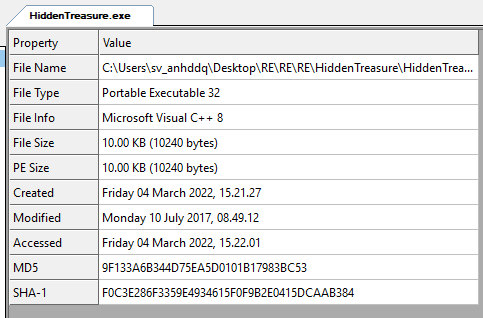

Sau khi đọc và phân tích có thể thấy file sẽ lấy input gồm 2 phần là ảnh (.bmp) và chuỗi string hòng chèn thông tin và giấu vào ảnh.
Source code qua quá trình phân tích và lượng giản còn các thành phần chính như sau:

Thứ nhất là phần tạo mảng và đọc thông tin, phần này chưa có gì quan trọng chỉ chú ý là đầu vào gồm 2 argument là file (`argv[1]`) và string (`argv[2]`)
```
  if ( argc == 3 )
  {
    memset(Dest, 0, sizeof(Dest));
    wcstombs(Dest, (const wchar_t *)argv[2], 0x100u);
    v3 = strlen(Dest);
    if ( v3 )
    {
      FileW = CreateFileW((LPCWSTR)argv[1], 0xC0000000, 1u, 0, 3u, 0x80u, 0);
      v5 = FileW;
      v23 = FileW;
      if ( FileW != (HANDLE)-1 )
      {
        FileSize = GetFileSize(FileW, 0);
        if ( FileSize == -1
          || (FileMappingW = CreateFileMappingW(v5, 0, 4u, 0, 0, 0), v8 = FileMappingW, (hObject = FileMappingW) == 0) )
        {
          CloseHandle(v5);
          return 0;
        }
        lpBaseAddress = (char *)MapViewOfFile(FileMappingW, 6u, 0, 0, 0);
```

tiếp theo đó là đoạn code để tách các bit của input string sau đó lưu vào mảng:

```
if ( lpBaseAddress )
        {
          bit_map = malloc(8 * v3);             // v3 = strlen(Dest); (a.k.a input string)
          v10 = 0;
          v29 = bit_map;
          bit_cnt = 0;
          v32 = 0;
          do
          {
            v12 = Dest[v10];
            bit_map[bit_cnt] = v12 & 1;
            bit_map[bit_cnt + 1] = (v12 >> 1) & 1;
            bit_map[bit_cnt + 2] = (v12 >> 2) & 1;
            bit_map[bit_cnt + 3] = (v12 >> 3) & 1;
            bit_map[bit_cnt + 4] = (v12 >> 4) & 1;
            bit_map[bit_cnt + 5] = (v12 >> 5) & 1;
            bit_map[bit_cnt + 6] = (v12 >> 6) & 1;
            v10 = v32 + 1;
            bit_map[bit_cnt + 7] = (v12 >> 7) & 1;
            bit_cnt += 8;
            v32 = v10;
          }
          while ( v10 < v3 );                   // split string to single bit then append to array
```

dựa vào bảng trong [bmp file header](https://www.file-recovery.com/bmp-signature-format.htm) tiến hành phân tích đoạn code tiếp theo:
```
v13 = lpBaseAddress;
          if ( *(_WORD *)lpBaseAddress == 'MB' && FileSize >= *(_DWORD *)(lpBaseAddress + 2) )// check signature and file size
          {
            v14 = *(_DWORD *)(lpBaseAddress + 10);
            if ( v14 < FileSize && bit_cnt < *(_DWORD *)(lpBaseAddress + 34) )
            {
              cnt = 0;
              width = *(_DWORD *)(lpBaseAddress + 18);
              height = *(_DWORD *)(lpBaseAddress + 22);
              start_data = &lpBaseAddress[v14];
              c_height = 0;
              v25 = width;
              sstart_data = start_data;
              *((_WORD *)lpBaseAddress + 3) = bit_cnt;
              v33 = 0;
              if ( bit_cnt )
              {
                v19 = 0;
                v31 = 0;
                do
                {
                  if ( c_height >= height )
                    break;
                  c_width = 0;
                  if ( cnt < bit_cnt )
                  {
                    do
                    {
                      if ( c_width >= width )
                        break;
                      v21 = v19 + c_width++;
                      bit_val = bbit_map[cnt++];
                      sstart_data[2 * v21 + v21] = bit_val;// save bit to image
                      v19 = v31;
                      width = v25;
                    }
                    while ( cnt < bit_cnt );
                    c_height = v33;
                  }
                  ++c_height;
                  v19 += 3 * width;
                  v33 = c_height;
                  v31 = v19;
                }
                while ( cnt < bit_cnt );
                v13 = lpBaseAddress;
              }
              bit_map = bbit_map;
            }
          }
          free(bit_map);
          UnmapViewOfFile(v13);
          CloseHandle(hObject);
          CloseHandle(v23);
        }
        else
        {
          CloseHandle(v8);
          CloseHandle(v5);
        }
      }
```

Những dòng đầu đơn giản là kiểm tra header và size xem có phù hợp để chèn chuỗi vào hay không, và ta chỉ cần quan tâm đến dòng `save bit to image`. Công việc của nó là chèn các bit từ bit_array sau đó chèn vào phần data của ảnh


Vậy có thể kết luận rằng flag nằm trong tấm ảnh đã cho đi kèm theo file

Solve:

Trước tiên dùng HxD để kiểm tra size của flag (nằm ở word thứ 3 tính từ đầu file) 

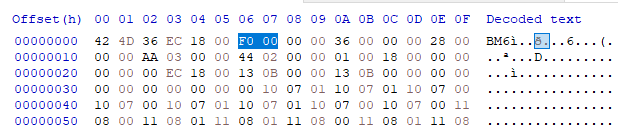

Vậy có size = 240 (0xf0) => flag size = 240/8 = 30

tiếp đến là đọc data từ file để lấy được bit_arr (tiến hành đặt brk point và dùng python để đọc data)

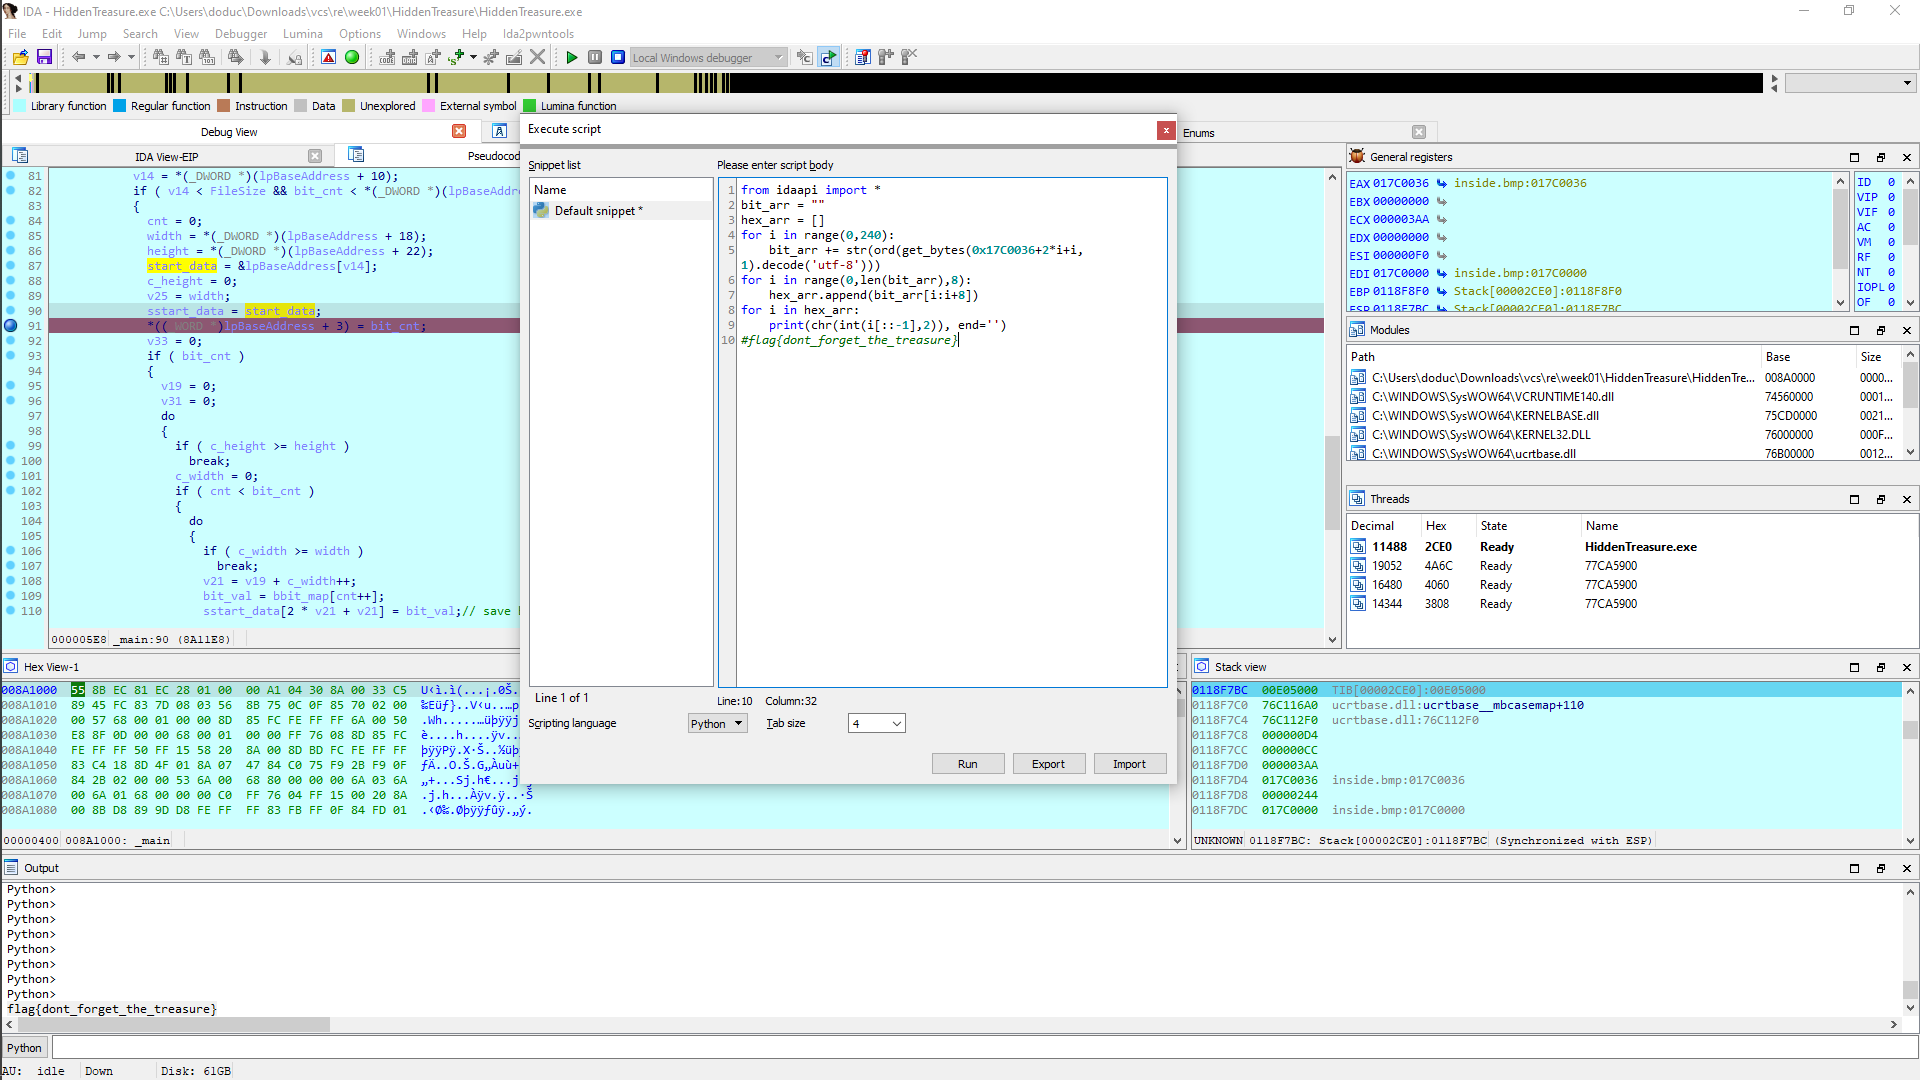

script:
```
from idaapi import *
bit_arr = ""
hex_arr = []
for i in range(0,240):
    bit_arr += str(ord(get_bytes(start_data_addr+2*i+i, 1).decode('utf-8')))
for i in range(0,len(bit_arr),8):
    hex_arr.append(bit_arr[i:i+8])
for i in hex_arr:
    print(chr(int(i[::-1],2)), end='')
#flag{dont_forget_the_treasure}
```

flag{dont_forget_the_treasure}